# ANGSD and KGD analysis for workshop

## Rebekah Frampton, John McCallum March 2019


* Reduced number of TPP samples to N=143
*  create the bamfile from the metadata file
* Run ANGSD to get allele counts (for KGD)  and genotype likelihoods
* Run KGD
    + No filter
    + Check coverage of samples - need to know of there are low coverage ones still in the subset
* Run KGD with HW filter and sample depth threshold

In [2]:
module purge
module load angsd
module load R
module list

Currently Loaded Modulefiles:
  1) use.own             4) angsd/0.925         7) texlive/20151117
  2) system/0.3          5) unixODBC/2.3.0      8) R/3.5.2
  3) singularity/2.6.1   6) JAGS/4.2.0


In [3]:
pwd

/powerplant/workspace/cfljam/MBIE_TPP_Populations


In [4]:
mkdir -p 23_workshop_subset_angsd_kgd/LOG

In [35]:
LOGDIR=/powerplant/workspace/cfljam/MBIE_TPP_Populations/23_workshop_subset_angsd_kgd/LOG

In [6]:
REF=/workspace/cflryf/git/MBIE_TPP_Populations/16_TPP_trial_contigs/TPP_10_contigs.fasta
OUTDIR=/workspace/cfljam/MBIE_TPP_Populations/23_workshop_subset_angsd_kgd

In [7]:
head 190122_pop_subset_metadata.tsv

Unique_sample_ID	Location2	Collection_Group	Sex	bam_path
0002_140826_Hon01_F	Sinuapa	Honduras_1	F	/output/genomic/insect/Bactericera/cockerelli/BAM/season1_trim_C732HANXX-1587-01-25-1_L007_map_190110_2_RG.bam
0003_140826_Hon02_M	Sinuapa	Honduras_1	M	/output/genomic/insect/Bactericera/cockerelli/BAM/season1_trim_C732HANXX-1587-02-25-1_L007_map_190110_2_RG.bam
0004_140826_Hon02_F	Sinuapa	Honduras_1	F	/output/genomic/insect/Bactericera/cockerelli/BAM/season1_trim_C732HANXX-1587-03-25-1_L007_map_190110_2_RG.bam
0005_140826_Hon03_M	Sinuapa	Honduras_1	M	/output/genomic/insect/Bactericera/cockerelli/BAM/season1_trim_C732HANXX-1587-04-25-1_L007_map_190110_2_RG.bam
0006_140826_Hon03_F	Sinuapa	Honduras_1	F	/output/genomic/insect/Bactericera/cockerelli/BAM/season1_trim_C732HANXX-1587-05-25-1_L007_map_190110_2_RG.bam
0018_140826_Hon09_F	La_Esperanza	Honduras_2	F	/output/genomic/insect/Bactericera/cockerelli/BAM/season1_trim_C732HANXX-1587-06-25-1_L007_map_190110_2_RG.bam
0023_140930_Hon01_F	Sinuap

In [8]:
## Create Bamfile list 
awk 'NR > 1{print $5}' 190122_pop_subset_metadata.tsv | tee $OUTDIR/190211_TPP.bamlist | head -n 5

/output/genomic/insect/Bactericera/cockerelli/BAM/season1_trim_C732HANXX-1587-01-25-1_L007_map_190110_2_RG.bam
/output/genomic/insect/Bactericera/cockerelli/BAM/season1_trim_C732HANXX-1587-02-25-1_L007_map_190110_2_RG.bam
/output/genomic/insect/Bactericera/cockerelli/BAM/season1_trim_C732HANXX-1587-03-25-1_L007_map_190110_2_RG.bam
/output/genomic/insect/Bactericera/cockerelli/BAM/season1_trim_C732HANXX-1587-04-25-1_L007_map_190110_2_RG.bam
/output/genomic/insect/Bactericera/cockerelli/BAM/season1_trim_C732HANXX-1587-05-25-1_L007_map_190110_2_RG.bam


In [9]:
BAMLIST=$OUTDIR/190211_TPP.bamlist

In [10]:
wc -l $BAMLIST

143 /workspace/cfljam/MBIE_TPP_Populations/23_workshop_subset_angsd_kgd/190211_TPP.bamlist


### ANGSD
 conditions :
*  32 threads
* Updated -setMinDepth 144 (1x)
* Updated -setMaxDepth 14400 (100x)

In [23]:
bsub << EOF
#!/bin/bash
#BSUB -J angsd_workshop
#BSUB -n 32 
#BSUB -o $LOGDIR/angsd_workshop.out
#BSUB -e $LOGDIR/angsd_workshop.err

### generate a file with allele frequencies (*.mafs.gz) and a file with genotype likelihoods (*.glf.gz).
### generate counts and depth for QC and KGD
angsd \
     -nThreads 32 \
     -bam  $BAMLIST \
     -ref $REF \
     -uniqueOnly 1 \
     -only_proper_pairs 1 \
     -trim 0 \
     -C 50 \
     -baq 1 \
     -minMapQ 20 \
     -setMinDepth  144 \
     -setMaxDepth  14400 \
     -gl 2 \
     -doMajorMinor 1 \
     -dumpCounts 4   \
     -doDepth 7 \
     -doCounts 1 \
     -snp_pval 1e-6 \
     -doMaf 1 \
     -minmaf 0.005 \
     -doGlf 3 \
     -out $OUTDIR/workshop_TPP
     
EOF

Job <691474> is submitted to default queue <normal>.


In [11]:
bjobs

JOBID   USER    STAT  QUEUE      FROM_HOST   EXEC_HOST   JOB_NAME   SUBMIT_TIME
691474  cfljam  RUN   normal     aklppr31    aklppb42    *_workshop Mar 21 09:55
                                             aklppb42
                                             aklppb42
                                             aklppb42
                                             aklppb42
                                             aklppb42
                                             aklppb42
                                             aklppb42
                                             aklppb42
                                             aklppb42
                                             aklppb40
                                             aklppb40
                                             aklppb40
                                             aklppb40
                                             aklppb40
                                             aklppb40
                             

In [20]:
# Check the Output
ls -lh $OUTDIR/workshop_TPP*

-rw-r--r--. 1 cfljam powerplant    0 Mar 21 09:55 /workspace/cfljam/MBIE_TPP_Populations/23_workshop_subset_angsd_kgd/workshop_TPP.arg
-rw-r--r--. 1 cfljam powerplant 5.5M Mar 21 10:27 /workspace/cfljam/MBIE_TPP_Populations/23_workshop_subset_angsd_kgd/workshop_TPP.counts.gz
-rw-r--r--. 1 cfljam powerplant  35M Mar 21 10:27 /workspace/cfljam/MBIE_TPP_Populations/23_workshop_subset_angsd_kgd/workshop_TPP.glf.gz
-rw-r--r--. 1 cfljam powerplant    0 Mar 21 09:55 /workspace/cfljam/MBIE_TPP_Populations/23_workshop_subset_angsd_kgd/workshop_TPP.glf.pos.gz
-rw-r--r--. 1 cfljam powerplant    0 Mar 21 09:55 /workspace/cfljam/MBIE_TPP_Populations/23_workshop_subset_angsd_kgd/workshop_TPP.mafs.gz
-rw-r--r--. 1 cfljam powerplant    0 Mar 21 09:55 /workspace/cfljam/MBIE_TPP_Populations/23_workshop_subset_angsd_kgd/workshop_TPP.pos.gz


In [14]:
## Check the Counts file format. ACGT quartets (just picking a random polymorphic site in this case)
zcat $OUTDIR/workshop_TPP.counts.gz | awk '/14/' | head -n 2 

ind0_A	ind0_C	ind0_G	ind0_T	ind1_A	ind1_C	ind1_G	ind1_T	ind2_A	ind2_C	ind2_G	ind2_T	ind3_A	ind3_C	ind3_G	ind3_T	ind4_A	ind4_C	ind4_G	ind4_T	ind5_A	ind5_C	ind5_G	ind5_T	ind6_A	ind6_C	ind6_G	ind6_T	ind7_A	ind7_C	ind7_G	ind7_T	ind8_A	ind8_C	ind8_G	ind8_T	ind9_A	ind9_C	ind9_G	ind9_T	ind10_A	ind10_C	ind10_G	ind10_T	ind11_A	ind11_C	ind11_G	ind11_T	ind12_A	ind12_C	ind12_G	ind12_T	ind13_A	ind13_C	ind13_G	ind13_T	ind14_A	ind14_C	ind14_G	ind14_T	ind15_A	ind15_C	ind15_G	ind15_T	ind16_A	ind16_C	ind16_G	ind16_T	ind17_A	ind17_C	ind17_G	ind17_T	ind18_A	ind18_C	ind18_G	ind18_T	ind19_A	ind19_C	ind19_G	ind19_T	ind20_A	ind20_C	ind20_G	ind20_T	ind21_A	ind21_C	ind21_G	ind21_T	ind22_A	ind22_C	ind22_G	ind22_T	ind23_A	ind23_C	ind23_G	ind23_T	ind24_A	ind24_C	ind24_G	ind24_T	ind25_A	ind25_C	ind25_G	ind25_T	ind26_A	ind26_C	ind26_G	ind26_T	ind27_A	ind27_C	ind27_G	ind27_T	ind28_A	ind28_C	ind28_G	ind28_T	ind29_A	ind29_C	ind29_G	ind29_T	ind30_A	ind30_C	ind30_G	ind30_T	ind31_A	ind31_C	ind31_G	ind31_T	ind32_A	ind32_C	

In [27]:
## Look at MAFs from GLs
zcat 23_workshop_subset_angsd_kgd/workshop_TPP.mafs.gz | head 

chromo	position	major	minor	ref	knownEM	pK-EM	nInd
scaffold192_cov247	292	T	C	T	0.080471	1.498174e-10	84
scaffold192_cov247	305	C	T	C	0.055892	6.849669e-09	86
scaffold192_cov247	317	G	A	G	0.037096	4.120690e-10	85
scaffold192_cov247	335	C	T	C	0.192571	0.000000e+00	79
scaffold192_cov247	339	T	A	T	0.072362	2.257724e-08	81
scaffold192_cov247	341	T	C	T	0.142680	0.000000e+00	81
scaffold192_cov247	364	A	T	A	0.031239	5.847262e-07	83
scaffold192_cov247	366	A	G	A	0.103841	0.000000e+00	81
scaffold192_cov247	378	C	T	C	0.036993	7.771091e-08	82

gzip: stdout: Broken pipe


### Run KGD using Counts from ANGSD

* No filter

In [30]:
## Create directory for output
mkdir -p 23_workshop_subset_angsd_kgd/KGD_no_filter

* add index (numeric) column in metadata file (dont use it in this step)
* run with 4 threads

In [34]:
echo $LOGDIR
ls $LOGDIR

/powerplant/workspace/cflryf/git/MBIE_TPP_Populations/23_workshop_subset_angsd_kgd/LOG
angsd_workshop_2.err  KGD_HWF_10_2.err	KGD_nofilter_2.err  NGSRELATE.err
angsd_workshop_2.out  KGD_HWF_10_2.out	KGD_nofilter_2.out  NGSRELATE.out
angsd_workshop.err    KGD_HWF_10.err	KGD_nofilter.err
angsd_workshop.out    KGD_HWF_10.out	KGD_nofilter.out


In [37]:
bsub << EOF
#!/bin/bash
#BSUB -J KGD_nofilter
#BSUB -n 4 
#BSUB -o $LOGDIR/KGD_nofilter.out
#BSUB -e $LOGDIR/KGD_nofilter.err

Rscript -e "\
    setwd('/powerplant/workspace/cfljam/MBIE_TPP_Populations/23_workshop_subset_angsd_kgd/KGD_no_filter'); \
    library(data.table); \
    DTmeta <- fread('/powerplant/workspace/cfljam/MBIE_TPP_Populations/190122_pop_subset_metadata.tsv'); \
    DTmeta[,seqID:=paste0('ind',.I -1)]; \
    nThreads <- 4 ; \
    genofile <- '/powerplant/workspace/cfljam/MBIE_TPP_Populations/23_workshop_subset_angsd_kgd/workshop_TPP.counts.gz'; \
    gform <- 'ANGSDcounts'; \
    source('/workspace/cfljam/CaptureGBS/RapidGenomics_PFR_100901/KGD/GBS-Chip-Gmatrix.R'); \
    myCoan <- calcG(mdsplot = TRUE, npc = 6, sfx = 'no_filter')"
EOF

Job <691812> is submitted to default queue <normal>.


In [32]:
bjobs

JOBID   USER    STAT  QUEUE      FROM_HOST   EXEC_HOST   JOB_NAME   SUBMIT_TIME
691810  cfljam  RUN   normal     aklppr31    wkoppb41    *_nofilter Mar 21 12:54
                                             wkoppb41
                                             wkoppb41
                                             wkoppb41


### Check coverage graph

* this uses imagemagick (system install in our case )  **display** function
* could also install into a conda env https://anaconda.org/conda-forge/imagemagick

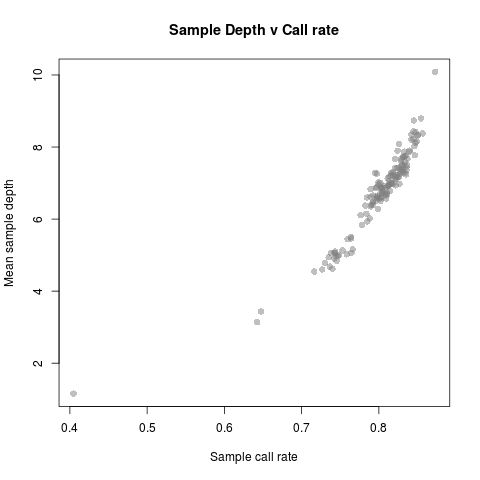

In [38]:
display < ./23_workshop_subset_angsd_kgd/KGD_no_filter/SampDepthCR.png

Three samples with low coverage.

In [39]:
awk -v FS=',' '$3 < 4 {print}' ./23_workshop_subset_angsd_kgd/KGD_no_filter/SampleStats.csv

"seqID","callrate","sampdepth"
"ind99",0.647420058515203,3.43414972034696
"ind127",0.404695689931457,1.1536696062113
"ind138",0.642602375758578,3.14138761669441


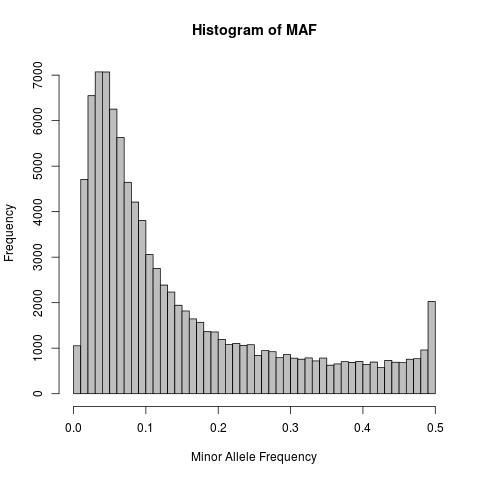

In [40]:
display < ./23_workshop_subset_angsd_kgd/KGD_no_filter/MAF.png

Need to trim off some duplicated loci MAF=0.5 with HW filter 

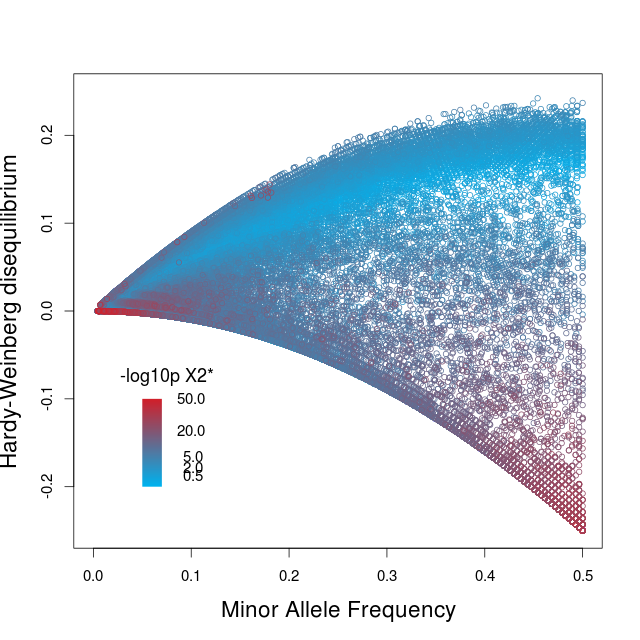

In [40]:
display < ./23_workshop_subset_angsd_kgd/KGD_no_filter/HWdisMAFsig.png

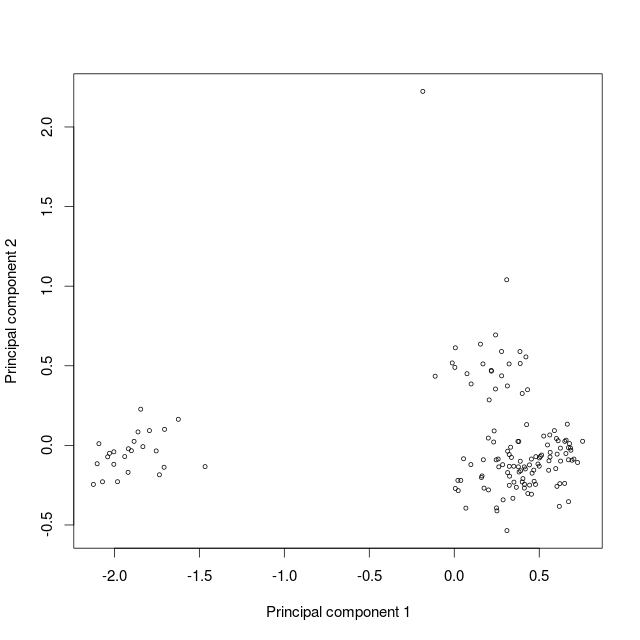

In [41]:
display < ./23_workshop_subset_angsd_kgd/KGD_no_filter/PC1v2G5no_filter.png

### Run KGD again 

* with HW filter and coverage threshold
* sampdepth > 4 
* HWdis  > -0.10

In [42]:
mkdir 23_workshop_subset_angsd_kgd/KGD_HWF_10

In [50]:
bsub << EOF
#!/bin/bash
#BSUB -J KGD_HWF_10
#BSUB -n 4 
#BSUB -o $LOGDIR/KGD_HWF_10.out
#BSUB -e $LOGDIR/KGD_HWF_10.err

Rscript -e "\
    setwd('/powerplant/workspace/cfljam/MBIE_TPP_Populations/23_workshop_subset_angsd_kgd/KGD_HWF_10'); \
    library(data.table); \
    DTmeta <- fread('/powerplant/workspace/cfljam/MBIE_TPP_Populations/190122_pop_subset_metadata.tsv'); \
    DTmeta[,seqID:=paste0('ind',.I -1)]; \
    nThreads <- 4 ; \
    sampdepth.thresh <- 4; \
    genofile <- '/powerplant/workspace/cfljam/MBIE_TPP_Populations/23_workshop_subset_angsd_kgd/workshop_TPP.counts.gz'; \
    gform <- 'ANGSDcounts'; \
    source('/workspace/cfljam/CaptureGBS/RapidGenomics_PFR_100901/KGD/GBS-Chip-Gmatrix.R'); \
    myCoan <- calcG(which(HWdis > -0.10), mdsplot = TRUE, npc = 6, sfx = 'HWF_10'); \
    writeG(myCoan,'/workspace/cfljam/MBIE_TPP_Populations/23_workshop_subset_angsd_kgd/KGD_HWF_10/HWF_10_metadata', \
    outtype=c(1,3,4,5,6), metadf=DTmeta[seqID %in% seqID])"

EOF

Job <691882> is submitted to default queue <normal>.


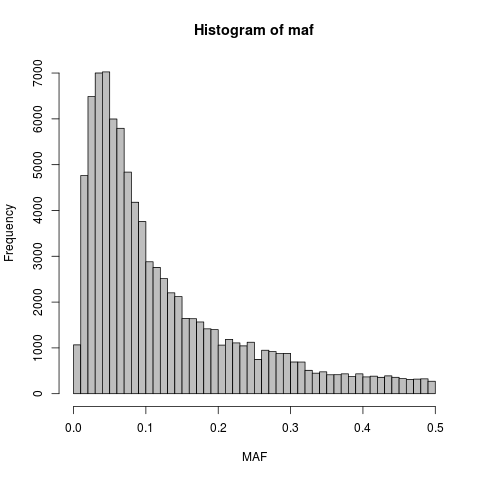

In [51]:
display < ./23_workshop_subset_angsd_kgd/KGD_HWF_10/MAFHWF_10.png

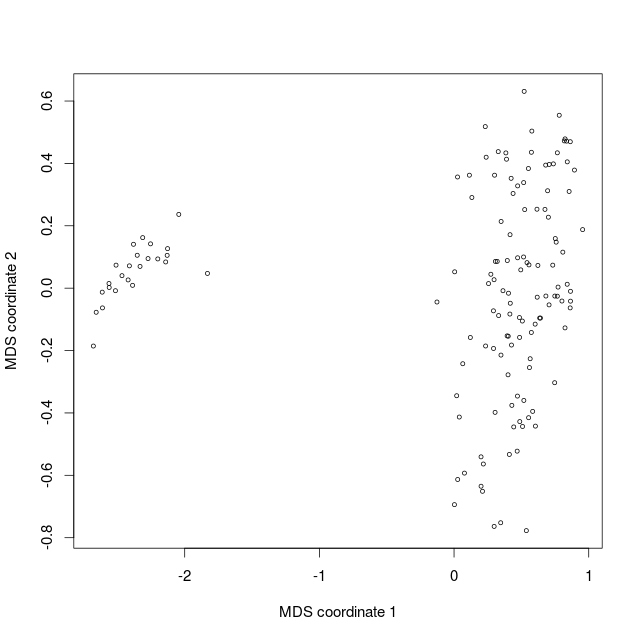

In [52]:
display < ./23_workshop_subset_angsd_kgd/KGD_HWF_10/MDS1v2G5HWF_10.png

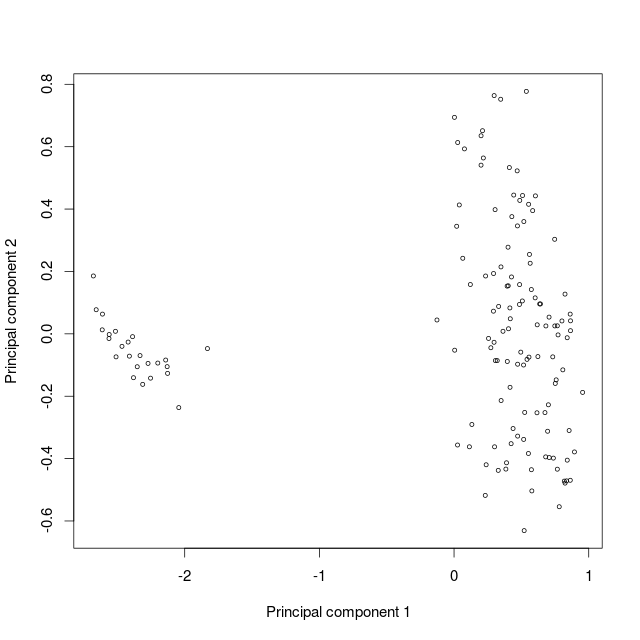

In [45]:
display < ./23_workshop_subset_angsd_kgd/KGD_HWF_10/PC1v2G5HWF_10.png

In [53]:
head ./23_workshop_subset_angsd_kgd/KGD_HWF_10/HWF_10_metadata-Inbreeding.csv

seqID,Inbreeding
ind0,0.712113923360504
ind1,0.974180373095279
ind2,0.775037055045877
ind3,0.961461602614167
ind4,0.739132572981523
ind5,0.694743377859895
ind6,0.698455722144941
ind7,0.838398859890826
ind8,0.795072076674343


### Run NGSrelate on Subset 

https://github.com/ANGSD/NgsRelate

using compiled version of ngsrelate

In [55]:
mkdir -p 21_nsrelate/LOG
LOGDIR=/powerplant/workspace/cfljam/MBIE_TPP_Populations/21_nsrelate/LOG

In [68]:
alias ngsRelate='/workspace/cfljam/CaptureGBS/QC_summaries/ngsRelate/ngsRelate'
ngsRelate


Usage main analyses: ./ngsrelate  [options] 
Options:
   -f <filename>       Name of file with frequencies
   -L <INT>            Number of genomic sites. Must be provided if -f (allele frequency file) is NOT provided 
   -m <INTEGER>        model 0=normalEM 1=acceleratedEM
   -i <UINTEGER>       Maximum number of EM iterations
   -t <FLOAT>          Tolerance for breaking EM
   -r <FLOAT>          Seed for rand
   -g gfile            Name of genotypellh file
   -p <INT>            threads (default 4)
   -c <INT>            Should call genotypes instead?
   -s <INT>            Should you swich the freq with 1-freq?
   -F <INT>            Estimate inbreeding instead of estimating the nine jacquard coefficients
   -o <INT>            estimating the 3 jacquard coefficient, assumming no inbreeding
   -v <INT>            Verbose. print like per iteration
   -e <INT>            Errorrates when calling genotypes?
   -a <INT>            First individual used for analysis? (zero offset)
   -b 

In [57]:
ls 23_workshop_subset_angsd_kgd

190211_TPP.bamlist  workshop_TPP.arg	      workshop_TPP.glf.gz
KGD_HWF_10	    workshop_TPP.counts.gz    workshop_TPP.glf.pos.gz
KGD_no_filter	    workshop_TPP.depthGlobal  workshop_TPP.mafs.gz
LOG		    workshop_TPP.depthSample  workshop_TPP.pos.gz


## Make a Freq file

In [60]:
zcat /powerplant/workspace/cfljam/MBIE_TPP_Populations/23_workshop_subset_angsd_kgd/workshop_TPP.mafs.gz \
| cut -f6 | sed 1d | tee  21_nsrelate/freq | head -n5 

0.080471
0.055892
0.037096
0.192571
0.072362
tee: standard output: Broken pipe
tee: write error


In [59]:
ls /powerplant/workspace/cfljam/MBIE_TPP_Populations/23_workshop_subset_angsd_kgd/workshop_TPP.glf.gz

/powerplant/workspace/cfljam/MBIE_TPP_Populations/23_workshop_subset_angsd_kgd/workshop_TPP.glf.gz


### Make a sample ID file

In [72]:
awk 'NR >1 {print $1}' ./190122_pop_subset_metadata.tsv | tee pop_subset.ID | head 

0002_140826_Hon01_F
0003_140826_Hon02_M
0004_140826_Hon02_F
0005_140826_Hon03_M
0006_140826_Hon03_F
0018_140826_Hon09_F
0023_140930_Hon01_F
0025_140930_Hon02_F
0026_140930_Hon02_M
0027_140930_Hon03_F


In [73]:
bsub << EOF
#!/bin/bash
#BSUB -J NGSRELATE
#BSUB -n 16
#BSUB -m aklppb34 
#BSUB -o $LOGDIR/NGSRELATE_2.out
#BSUB -e $LOGDIR/NGSRELATE_2.err

/workspace/cfljam/CaptureGBS/QC_summaries/ngsRelate/ngsRelate \
    -g /powerplant/workspace/cfljam/MBIE_TPP_Populations/23_workshop_subset_angsd_kgd/workshop_TPP.glf.gz \
    -p 16 \
    -n 143 \
    -f 21_nsrelate/freq \
    -z pop_subset.ID \
    > 21_nsrelate/relatedness_take_2
EOF

Job <691894> is submitted to default queue <normal>.


In [67]:
bjobs

JOBID   USER    STAT  QUEUE      FROM_HOST   EXEC_HOST   JOB_NAME   SUBMIT_TIME
691893  cfljam  RUN   normal     aklppr31    aklppb34    NGSRELATE  Mar 22 09:36
                                             aklppb34
                                             aklppb34
                                             aklppb34
                                             aklppb34
                                             aklppb34
                                             aklppb34
                                             aklppb34
                                             aklppb34
                                             aklppb34
                                             aklppb34
                                             aklppb34
                                             aklppb34
                                             aklppb34
                                             aklppb34
                                             aklppb34


In [74]:
head 21_nsrelate/relatedness_take_2

# /workspace/cfljam/CaptureGBS/QC_summaries/ngsRelate/ngsRelate -g /powerplant/workspace/cfljam/MBIE_TPP_Populations/23_workshop_subset_angsd_kgd/workshop_TPP.glf.gz -p 16 -n 143 -f 21_nsrelate/freq -z pop_subset.ID
a	b	ida	idb	nSites	J9	J8	J7	J6	J5	J4	J3	J2	J1	rab	Fa	Fb	theta	inbred_relatedness_1_2	inbred_relatedness_2_1	fraternity	identity	zygosity	2of3_IDB	F_diff_a_b	loglh	nIter	coverage	2dsfs	R0	R1	KING	2dsfs_loglike	2dsfsf_niter
0	1	0002_140826_Hon01_F	0003_140826_Hon02_M	60695	0.703331	0.000027	0.296641	0.000000	0.000000	0.000000	0.000000	0.000001	0.000000	0.296655	0.000001	0.000001	0.148327	0.000000	0.000000	0.296641	0.000000	0.296641	0.296655	0.000000	-79415.340579	58	0.378341	4.766782e-01,1.376658e-01,9.208277e-10,1.280525e-01,2.528323e-01,2.322444e-07,3.542241e-09,1.479619e-08,4.770938e-03	0.000000	0.951504	0.327765	-85684.149495	16
0	2	0002_140826_Hon01_F	0004_140826_Hon02_F	61559	0.691345	0.000001	0.308653	0.000000	0.000000	0.000000	0.000000	0.000000	0.000000	0.308654	0.000

In [75]:
gister -h

bash: gister: command not found


: 127